PMEDIAN

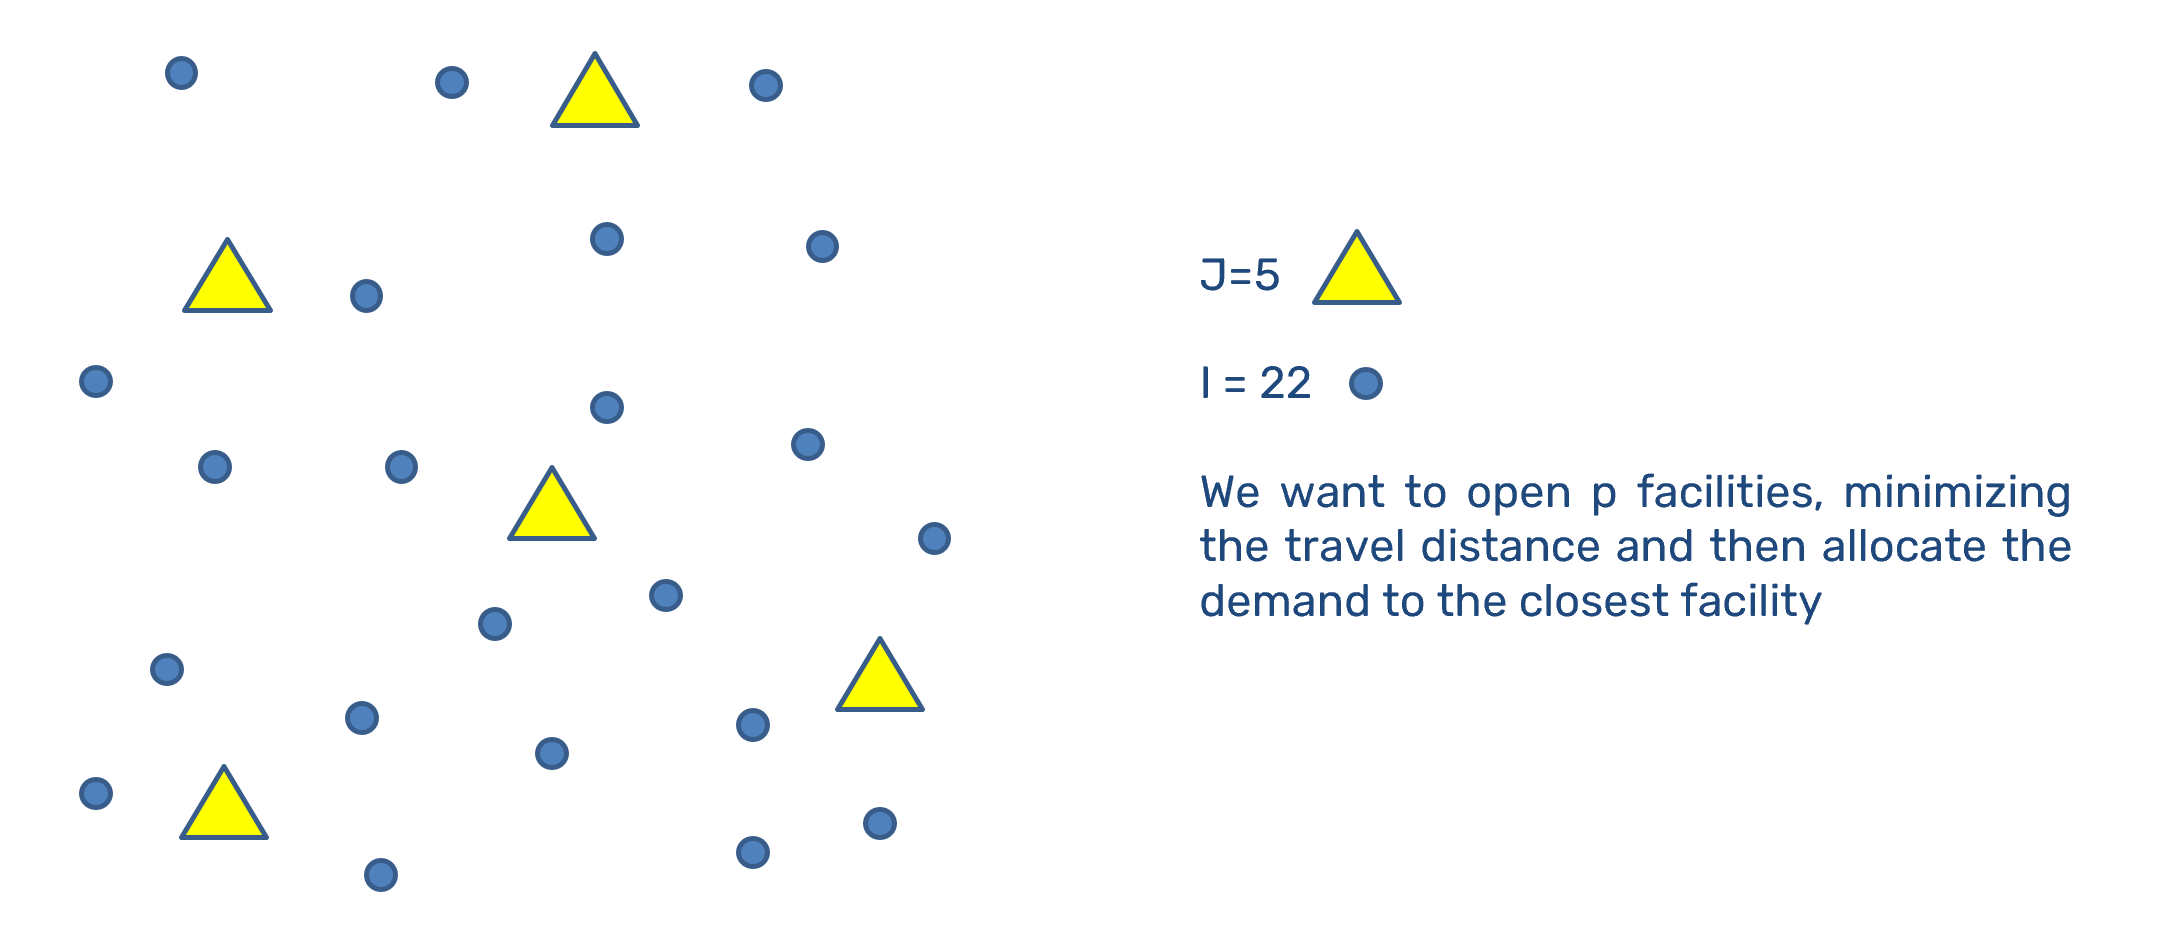

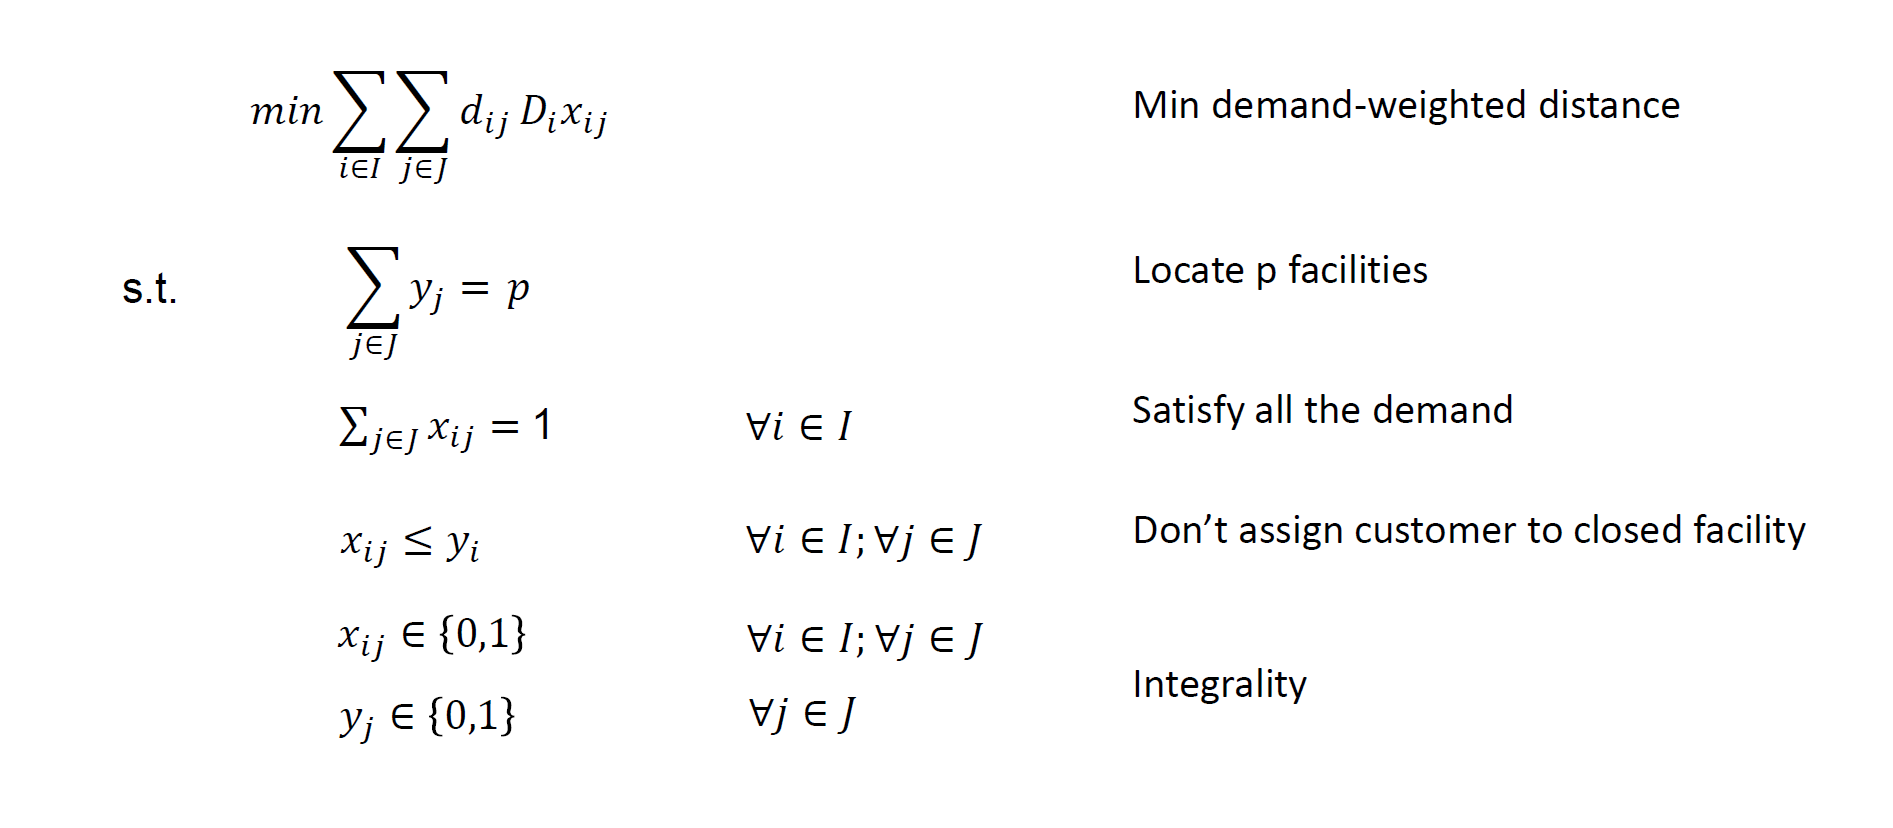

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c gurobi gurobi


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

# All requested packages already installed.






==> WARNING: A newer version of conda exists. <==
  current version: 23.7.2
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0




In [5]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\claud\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aiobotocore-2.5.0          |  py311haa95532_0         151 KB
    aiohttp-3.8.5              |  py311h2bbff1b_0         533 KB
    anaconda-anon-usage-0.4.3  |py311hfc23b7f_100          28 KB
    anaconda-cloud-auth-0.1.4  |  py311haa95532_0          39 KB
    anaconda-navigator-2.5.1   |  py311haa95532_0         5.6 MB
    aom-3.6.0                  |       hd77b12b_0         9.1 MB
    archspec-0.2.1             |     pyhd3eb1b0_0          39 KB
    arrow-cpp-11.0.0           |       ha81ea56_2         7.3 MB
    astropy-5.3.4              |  py311hd7041d2_0         9.7 MB
    attrs-23.1.0               |  py311haa95532_0         165 KB
    aws-c-common-0.6.8         |       h2bbff1b_1       

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset=pd.read_csv('customer.csv', sep=";") #import the customers' database
dataset.head()
#the dataset is composed by the costumers' ID, x and y coordinates and demand.
#This dataset consitute the set of clients I

,CUSTOMER,XCOORD,YCOORD,DEMAND
0,1,42.352345,10.245678,13
1,2,41.987654,12.098765,19
2,3,43.123456,6.567890,5
3,4,45.098765,15.432109,3
4,5,40.876543,9.876543,11


In [8]:
n=len(dataset) #number of clients

In [9]:
n

20

In [10]:
p=3 #number of facilities to open

In [11]:
N = [i for i in range(0, n)] #number of customers

In [12]:
N

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [13]:
dataset2=pd.read_csv('facility.csv', sep=";") #import the dataset regarding the possible facilities
m=len(dataset2) #number of available facilities
#This dataset consitutes the set of facilities J

In [14]:
dataset2.head()

,FACILITY,XCOORD,YCOORD
0,A,42.435678,12.543210
1,B,45.123456,7.654321
2,C,41.890123,13.987654
3,D,43.210987,9.876543
4,E,40.567890,15.098765


In [15]:
M = [i for i in range(0, m)] 

In [16]:
M #In total we have M candidates facilities, we need to choose the p facilities to open

[0, 1, 2, 3, 4, 5]

In [17]:
q={i: dataset.iloc[i]['DEMAND'] for i in N} #extraction of customer demand
#q = {i: rnd.randint(1, 10) for i in N}

In [18]:
q

{0: 13.0,
 1: 19.0,
 2: 5.0,
 3: 3.0,
 4: 11.0,
 5: 5.0,
 6: 8.0,
 7: 17.0,
 8: 3.0,
 9: 5.0,
 10: 2.0,
 11: 1.0,
 12: 3.0,
 13: 4.0,
 14: 1.0,
 15: 7.0,
 16: 5.0,
 17: 20.0,
 18: 1.0,
 19: 1.0}

In [19]:
xc = dataset['XCOORD'].tolist() #extract locations
yc = dataset['YCOORD'].tolist()

In [20]:
xc

[42.352345,
 41.987654,
 43.123456,
 45.098765,
 40.876543,
 42.56789,
 44.210987,
 41.432109,
 43.890123,
 40.345678,
 44.876543,
 42.210987,
 40.56789,
 45.765432,
 43.098765,
 41.345678,
 42.987654,
 44.432109,
 40.210987,
 45.678901]

In [21]:
yc

[10.245678,
 12.098765,
 6.56789,
 15.432109,
 9.876543,
 7.890123,
 17.654321,
 13.210987,
 8.432109,
 11.123456,
 6.890123,
 16.765432,
 14.987654,
 10.56789,
 18.210987,
 11.345678,
 15.098765,
 7.432109,
 13.876543,
 9.210987]

In [22]:
xf = dataset2['XCOORD'].tolist() #extract locations of the facilities
yf = dataset2['YCOORD'].tolist()

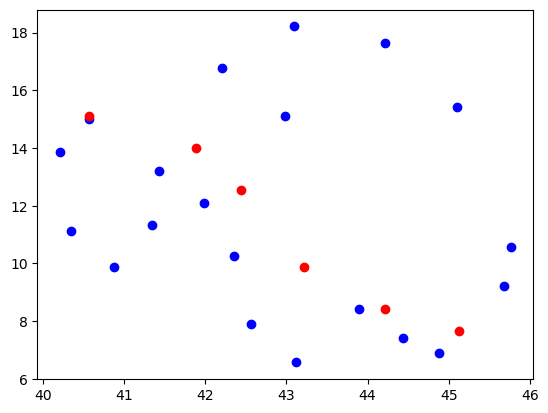

In [23]:
#Plot of the customers in blue and candidate facilities in red
#plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[0:], yc[0:], c='b')
plt.scatter(xf[0:], yf[0:], c='r')

In [25]:
#Definition of the decision variables for the optimization algorithm
A = [(i, j) for i in N for j in M]
Y = [(j) for j in M]


In [27]:
#Function for computing distances starding from x and y coordinates
from numpy import sin, cos, arccos, pi, round

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2, unit = 'kilometers'):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    if unit == 'miles':
        return round(distance, 2)
    if unit == 'kilometers':
        return round(distance * 1.609344, 2)

In [28]:
c = {(i, j): getDistanceBetweenPointsNew(xc[i], yc[i], xf[j], yf[j], 'kilometers') for i in N for j in M}
 #distance between customers and facilities

In [29]:
c

{(0, 0): 188.89,
 (0, 1): 371.81,
 (0, 2): 312.83,
 (0, 3): 100.11,
 (0, 4): 450.35,
 (0, 5): 253.48,
 (1, 0): 61.82,
 (1, 1): 499.68,
 (1, 2): 156.6,
 (1, 3): 227.11,
 (1, 4): 296.22,
 (1, 5): 386.88,
 (2, 0): 493.5,
 (2, 1): 238.68,
 (2, 2): 623.23,
 (2, 3): 268.48,
 (2, 4): 761.15,
 (2, 5): 192.62,
 (3, 0): 376.09,
 (3, 1): 610.1,
 (3, 2): 375.29,
 (3, 3): 490.24,
 (3, 4): 504.52,
 (3, 5): 562.21,
 (4, 0): 281.28,
 (4, 1): 505.55,
 (4, 2): 360.97,
 (4, 3): 259.57,
 (4, 4): 441.34,
 (4, 5): 389.16,
 (5, 0): 381.67,
 (5, 1): 284.78,
 (5, 2): 507.53,
 (5, 3): 176.91,
 (5, 4): 639.32,
 (5, 5): 187.87,
 (6, 0): 458.03,
 (6, 1): 796.74,
 (6, 2): 394.07,
 (6, 3): 634.67,
 (6, 4): 456.15,
 (6, 5): 734.61,
 (7, 0): 124.51,
 (7, 1): 608.66,
 (7, 2): 82.19,
 (7, 3): 337.99,
 (7, 4): 185.27,
 (7, 5): 497.21,
 (8, 0): 370.51,
 (8, 1): 150.36,
 (8, 2): 504.11,
 (8, 3): 138.75,
 (8, 4): 661.27,
 (8, 5): 35.68,
 (9, 0): 260.81,
 (9, 1): 601.92,
 (9, 2): 295.02,
 (9, 3): 334.94,
 (9, 4): 337.2,
 (9,

In [30]:
from gurobipy import Model, GRB, quicksum

In [31]:
mdl = Model('PMEDIAN') #Definition of the optimization model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-27


In [32]:
#Definition of the decision variables
x = mdl.addVars(A, vtype=GRB.BINARY)
y = mdl.addVars(Y, vtype=GRB.BINARY)

In [33]:
#We need to specify what we want to do with the objective function
#For the pmedian we need a minimization
mdl.modelSense = GRB.MINIMIZE 
mdl.setObjective(quicksum(x[i, j]*c[i, j]*q[i] for i, j in A)) #-->objective function


In [35]:
mdl.addConstr(quicksum(y[j] for j in M) == p) #Definition of the number of facility to open
mdl.addConstrs(quicksum(x[i, j] for j in M) == 1 for i in N) #Satisfy all the demand
mdl.addConstrs(x[i, j]<=y[j] for i in N for j in M) #Don't assign customer to closed facility

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (2, 0): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 5): <gurobi.Constr *Awaiting Model Update*>,
 (3, 0): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,


In [36]:
#mdl.Params.MIPGap = 0.1 #Gap for the optimization
#mdl.Params.TimeLimit = 30  # seconds. Needed if we want to stop the optimization even if we didn't reach the optimum
mdl.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 282 rows, 126 columns and 732 nonzeros
Model fingerprint: 0x90747424
Variable types: 0 continuous, 126 integer (126 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 2e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 39706.940000
Presolve removed 141 rows and 0 columns
Presolve time: 0.03s
Presolved: 141 rows, 126 columns, 366 nonzeros
Variable types: 0 continuous, 126 integer (126 binary)
Found heuristic solution: objective 22980.660000

Root relaxation: objective 2.195793e+04, 56 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

In [37]:
active_arcs = [a for a in A if x[a].x > 0.99]

In [38]:
active_arcs #arcs xij activated

[(0, 0),
 (1, 0),
 (2, 5),
 (3, 2),
 (4, 0),
 (5, 5),
 (6, 2),
 (7, 2),
 (8, 5),
 (9, 0),
 (10, 5),
 (11, 2),
 (12, 2),
 (13, 5),
 (14, 2),
 (15, 0),
 (16, 2),
 (17, 5),
 (18, 2),
 (19, 5)]

In [39]:
opened_facilities = [b for b in M if y[b].x > 0.99]

In [40]:
opened_facilities

[0, 2, 5]

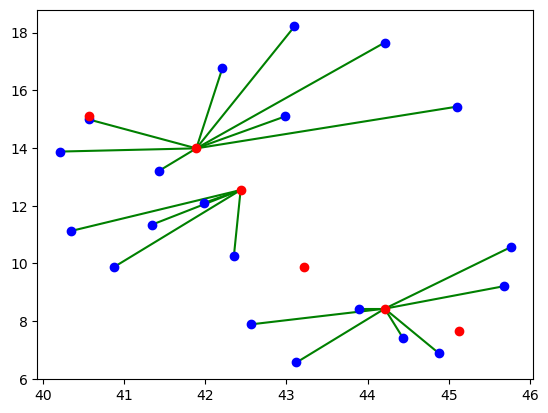

In [41]:
for i, j in active_arcs:
     plt.plot([xc[i], xf[j]], [yc[i], yf[j]], c='g', zorder=0)
plt.scatter(xc[0:], yc[0:], c='b')
plt.scatter(xf[0:], yf[0:], c='r')

In [42]:
demand_satisfied=0;
dist=0;
for i in range(n):
    for j in range(m):
        if (x[i,j].x>0.99):
            demand_satisfied=demand_satisfied+q[i];



In [43]:
demand_satisfied

134.0

In [44]:
total_demand=0;
for i in N:
    total_demand=total_demand+q[i]
    

In [45]:
total_demand

134.0